# Business Ties

Can we piece the business community/ economy of Eigg together from data online

In [1]:
%matplotlib inline
import sys
sys.path.insert(1,'../Utilities')
# notebook
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import networkx as nx
import json
from math import sin, cos, sqrt, atan2, radians
from utils import *
from data import *
#make the graphs bigger
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [18]:
def custByBusiness():
    relationships = {}
    relationships["Heritage Trust"] = ["Eigg Electric", "Eigg Construction", "Eigg Trading", "Small Isles Medical Centre"]
    relationships["Eigg Crafts"] = ["A Nead Knitwear", "Eddie's Eigg Croft"]
    relationships["Clean Planet Now"] = []
    relationships["Eigg Electric"] = [] # allBusinessNames() # EVERYONE?!
    relationships["Eigg Trading"] = ["Eigg Shop", "Craigard Teas", "Eigg Crafts"]    
    relationships["Eigg Construction"] = ["Eigg Trading"] #no evidence for anything apart from "5 (undocumented) refurbishments" - IEHT.com
    relationships["The Bothy Cuagach"] = [] #nothing documented
    relationships["Eigg Eco Centre"] = ["Eigg Shop", "Clean Planet Now"] #dining so involved with Eigg Organics lets say for means, and Eigg Shop to plug gap
    relationships["Eigg Huts"] = ["Eigg Shed", "Sweeney's Bothy"]
    relationships["Eigg Shed"] = ["Sweeney's Bothy"]
    relationships["Sandavore Farm"] = ["Galmisdale Cafe", "Lagerona"]
    relationships["Lagerona"] = ["Kildonnan House"]
    relationships["Sweeney's Bothy"] = ["Eigg Shed"]
    relationships["Eddie's Eigg Croft"] = [] #bluebell seeds only really 
    relationships["Kildonnan Bay Oysters"] = ["Lagerona", "Galmisdale Cafe"] #lets say they supply the restaurants 
    relationships["Eigg Shop"] = ["Galmisdale Cafe", "Lagerona"] #send nonlocal supplies to the restaurants [INCLUDE EVERYONE?]
    relationships["Glebe Barn"] = [] #no special interactions documented
    relationships["Laig Bay Brewing"] = ["Galmisdale Cafe", "Lagerona", "Eigg Shop"]
    relationships["Galmisdale Cafe"] = [] #nothing out of the ordinary/ undocumented added
    relationships["Equilibrium Eigg Massage Therapy"] = ["Small Isles Medical Centre"] # https://eiggmassagetherapy.wordpress.com/about/
    relationships["Eigg Organics"] = ["Eigg Eco Centre", "Eigg Shop"]
    relationships["Kildonnan House"] = [] #nothing out of the ordinary documenteds
    relationships["Hebnet Cic"] = ["Lagerona", "Glebe Barn", "Kildonnan House"] #EVERYONE?
    relationships["Eiggy Bread"] = ["Glebe Barn", "Eigg Shop"] #provide the catering them, suppose thye get ingredients from the shop
    relationships["Eigg Adventures"] = []  
    relationships["Eigg Camping Pods"] = []
    relationships["A Nead Knitwear"] = []
    relationships["Eigg Yurts"] = []
    relationships["Eigg History"] = []
    relationships["Craigard Teas"] = ["Eigg Shop"]
    
    return relationships

def customByBusiness():
    relationships = {}
    #heritage trust + subsidiaries => http://isleofeigg.org/ieht/
    #Beer in the shop => https://isleofeiggshop.com/our-stock/

    #subsidiary or interaction

    # INFERENCES LIST

    # Sandavore Farm => Lamb => Eigg Shop, Galmisdale Cafe, Lagerona

    # rigg eco centre promoting/ somehow involved in clean planet now => http://www.earthconnections.co.uk/
    # Eigg organics provides meals to eco centre http://www.earthconnections.co.uk/

    #iheritance on shop: Eigg Organics/ crofters => EIgg Shop => Lagerona/Eigg Bread ...

    relationships["Heritage Trust"] = ["Eigg Electric", "Eigg Construction", "Eigg Trading", "Small Isles Medical Centre"]
    relationships["Eigg Crafts"] = ["A Nead Knitwear", "Eddie's Eigg Croft"]
    relationships["Clean Planet Now"] = []
    relationships["Eigg Electric"] = []#allBusinessNames() # EVERYONE?!
    relationships["Eigg Trading"] = ["Eigg Shop", "Craigard Teas", "Eigg Crafts"]    
    relationships["Eigg Construction"] = ["Eigg Trading"] #no evidence for anything apart from "5 (undocumented) refurbishments" - IEHT.com
    relationships["The Bothy Cuagach"] = [] #nothing documented
    relationships["Eigg Eco Centre"] = ["Eigg Shop", "Clean Planet Now"] #dining so involved with Eigg Organics lets say for means, and Eigg Shop to plug gap
    relationships["Eigg Huts"] = ["Eigg Shed", "Sweeney's Bothy"]
    relationships["Eigg Shed"] = ["Sweeney's Bothy"]
    relationships["Sandavore Farm"] = ["Eigg Shop", "Galmisdale Cafe", "Lagerona"]
    relationships["Lagerona"] = ["Kildonnan House"]
    relationships["Sweeney's Bothy"] = ["Eigg Shed"]
    relationships["Eddie's Eigg Croft"] = [] #bluebell seeds only really 
    relationships["Kildonnan Bay Oysters"] = ["Lagerona", "Galmisdale Cafe"] #lets say they supply the restaurants 
    relationships["Eigg Shop"] = ["Galmisdale Cafe", "Lagerona"] #send nonlocal supplies to the restaurants [INCLUDE EVERYONE?]
    relationships["Glebe Barn"] = [] #no special interactions documented
    relationships["Laig Bay Brewing"] = ["Galmisdale Cafe", "Lagerona", "Eigg Shop"]
    relationships["Galmisdale Cafe"] = [] #nothing out of the ordinary/ undocumented added
    relationships["Equilibrium Eigg Massage Therapy"] = ["Small Isles Medical Centre"] # https://eiggmassagetherapy.wordpress.com/about/
    relationships["Eigg Organics"] = ["Eigg Eco Centre", "Eigg Shop", "Lagerona"]
    relationships["Kildonnan House"] = [] #nothing out of the ordinary documenteds
    relationships["Hebnet Cic"] = ["Lagerona", "Glebe Barn", "Kildonnan House"] #EVERYONE?
    relationships["Eiggy Bread"] = ["Glebe Barn", "Eigg Shop"] #provide the catering them, suppose thye get ingredients from the shop
    relationships["Eigg Adventures"] = []  
    relationships["Eigg Camping Pods"] = []
    relationships["A Nead Knitwear"] = []
    relationships["Eigg Yurts"] = []
    relationships["Eigg History"] = []
    relationships["Craigard Teas"] = ["Eigg Shop"]
    
    return relationships

def buildDirectLinkNetOnly():
    G = nx.Graph()
    
    data = customByBusiness()
        
    names = data.keys()
    for k,i in enumerate(names): G.add_node(i)
        
    for name1 in names:
        connects = data[name1]
        for item in connects:
            G.add_edge(name1,item)
    
    labels={}
    for k,i in enumerate(names): labels[i] = i
    return G, labels
    

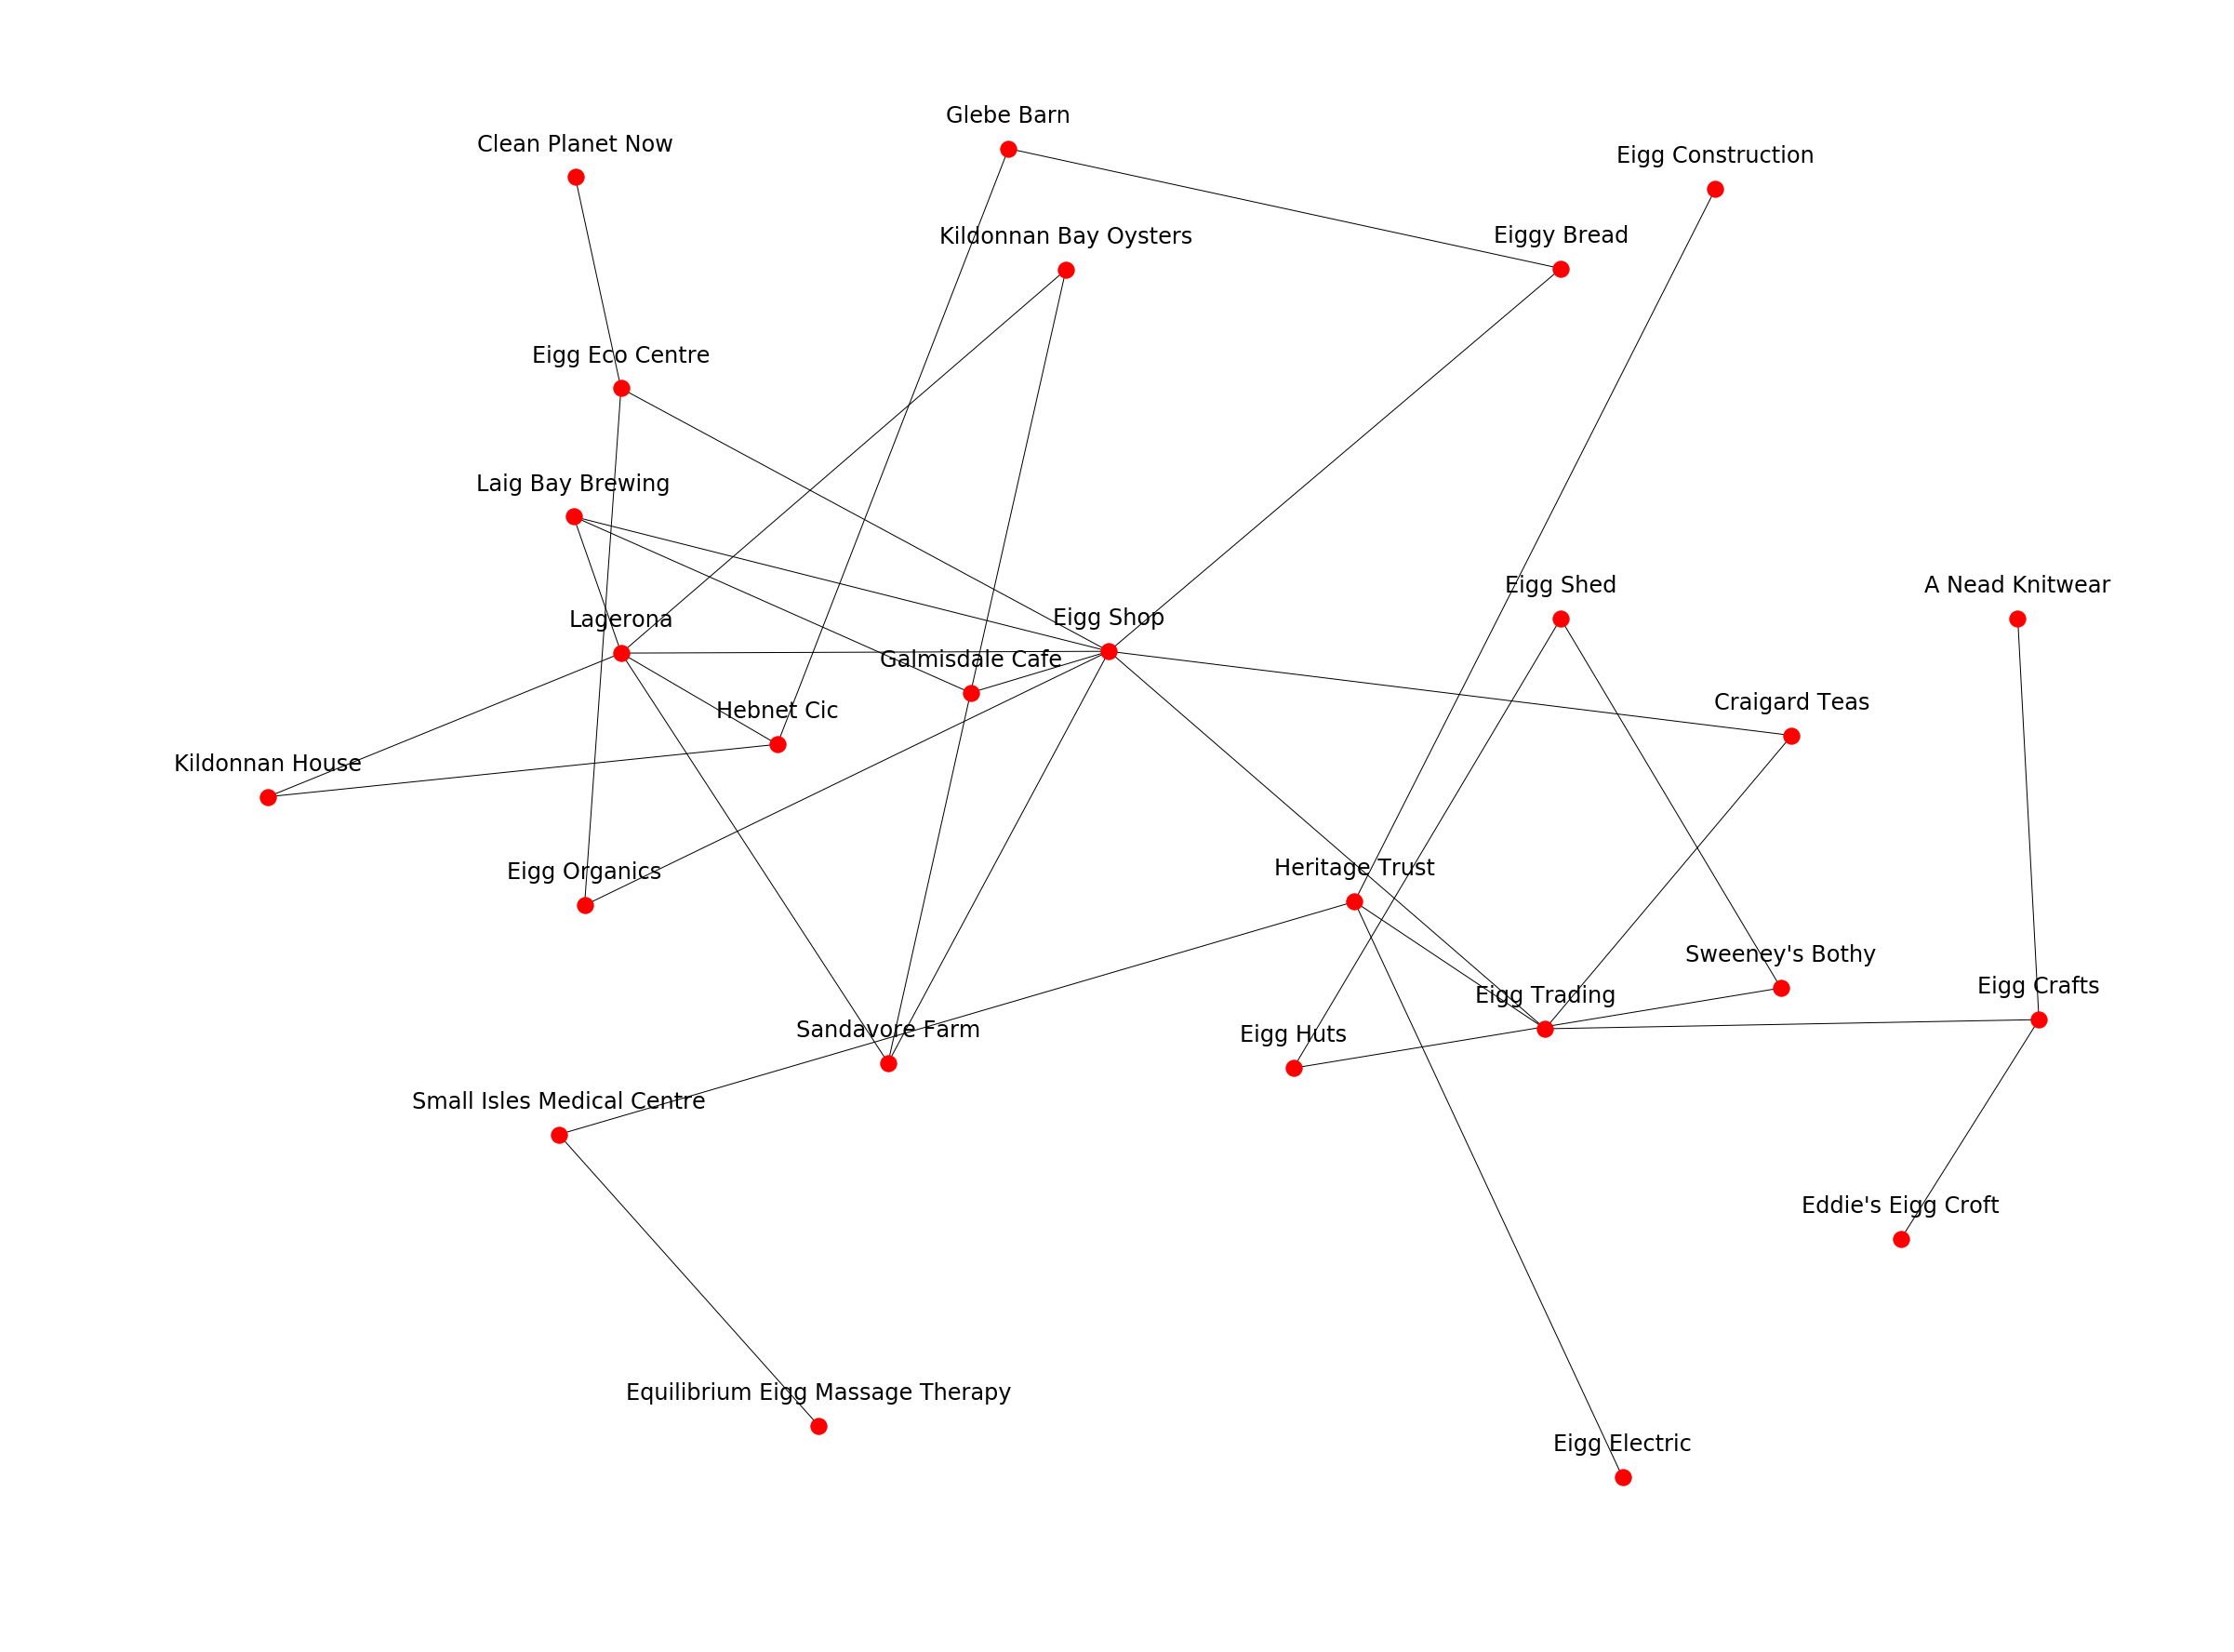

In [17]:
G,labels = buildDirectLinkNetOnly()
G.remove_nodes_from(list(nx.isolates(G)))

pos=nx.spring_layout(G,k=1)
#nx.draw_networkx_labels(G,pos,labels,font_size=16)
nx.draw(G,pos)
saveGraphToFile(G)
for label in pos:
    x,y = pos[label]
    plt.text(x,y+0.035,s=label,horizontalalignment='center',fontsize=24)


In [4]:
def buildNamedBusinessGraph(inferred=False):
    G = nx.Graph()
    
    data = uninferredNamesGraph()
    if inferred:
        data = inferredNamesGraph()
                
    names = data.keys()
    for k,i in enumerate(names): G.add_node(i)
        
    for name1 in names:
        for name2 in names:
            if name1 != name2 and len(list(set(data[name1]) & set(data[name2]))):
                G.add_edge(name1,name2)
    
    labels={}
    for k,i in enumerate(names): labels[i] = i
    return G, labels

def buildBusinessGraph(inferred=False):
    G = nx.Graph()
    data = uninferredNamesGraph()
    if inferred:
        data = inferredNamesGraph()
    
    names = data.keys()
    businesses = list(Counter([item for sublist in data.values() for item in sublist]).keys())
    
    businessMembers = defaultdict(list)
    for b in businesses:
        for name in names:
            if b in data[name]:
                businessMembers[b].append(name)
            
    businessList = businessMembers.keys()
    for k,i in enumerate(businessList): G.add_node(i)
    for b1 in businessList:
        for b2 in businessList:
            if b1 != b2 and len(list(set(businessMembers[b1]) & set(businessMembers[b2]))):
                G.add_edge(b1,b2)
    
    labels={}
    for k,i in enumerate(businessList): labels[i] = i
    return G, labels

def poliFn(companiesForPerson):
    buildStr = ""
    buildStr += str(int("Heritage Trust" in companiesForPerson)) + " "
    buildStr += str(int("Eigg Electric" in companiesForPerson)) + " "
    buildStr += str(int("Eigg Construction" in companiesForPerson)) + " "
    buildStr += str(int("Eigg Trading" in companiesForPerson))
    
    return buildStr

def saveComplexPoliticalAttributes(G,dataDict):
    labelsInOrder = list(G.nodes())
    attributesInOrder = list(map(lambda x: poliFn(dataDict[x]),G.nodes()))
    np.savetxt('privateNetAttrLabels.txt', labelsInOrder, '%s')
    np.savetxt('privateNetAttrAttributes.txt', attributesInOrder, "%s")
    
def saveGraphToFile(G, filename="noElectrics.txt"):
    file_ = nx.to_numpy_matrix(G)
    labelsInOrder = list(G.nodes())
    np.savetxt('noElectricsLabs.txt', labelsInOrder, '%s')
    np.savetxt(filename,file_, "%d") 

In [ ]:
G, labels= buildNamedBusinessGraph()
print(len(G.degree))
pos=nx.spring_layout(G,k=1)
#nx.draw_networkx_labels(G,pos,labels,font_size=16)
nx.draw(G,pos)
saveGraphToFile(G)
for label in pos:
    x,y = pos[label]
    plt.text(x,y+0.035,s=label,horizontalalignment='center',fontsize=24)

In [ ]:
G, labels= buildBusinessGraph()
print(G.nodes())

G.remove_nodes_from(list(nx.isolates(G)))

pos=nx.spring_layout(G,k=1)
nx.draw(G,pos)
saveGraphToFile(G)

for label in pos:
    x,y = pos[label]
    plt.text(x,y+0.035,s=label,horizontalalignment='center',fontsize=24)

In [ ]:
list(G.edges())

In [ ]:
G, labels= buildNamedBusinessGraph(inferred=True)
pos=nx.spring_layout(G,k=1)
saveGraphToFile(G,"namedBusinessNet.txt")
#nx.draw_networkx_labels(G,pos,labels,font_size=16)
nx.draw(G,pos)
print(len(G.edges()))
for label in pos:
    x,y = pos[label]
    plt.text(x,y+0.035,s=label,horizontalalignment='center',fontsize=24)

In [ ]:
G, labels= buildBusinessGraph(inferred=True)
pos=nx.spring_layout(G,k=1)
saveGraphToFile(G,"businessNet.txt")
nx.draw_networkx_labels(G,pos,labels,font_size=16)
nx.draw(G,pos)

In [ ]:
d = inferredBusinessLocations()
dict_ = {}

for item in d:
    one,two = d[item].split(",")
    dict_[item] = [float(one),float(two)]

generateMapJSON([('./fullColMarkers/marker76.png',list(dict_.values()),list(dict_.keys()))],[(dict_,G)],'businessByLocation.txt')